In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from IPython.display import Image

In [2]:
dataset=pd.read_csv("golf_1.csv", index_col=0)

In [3]:
dataset

,Outlook,Temperature,Humidity,Windy,Play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [4]:
#one hot encoding
x=pd.get_dummies(dataset[['Outlook','Temperature','Humidity','Windy']])

In [5]:
#x.loc[:, 'Windy'].replace([True, False],[1,0], inplace=True)

In [6]:
x

,Windy,Outlook_overcast,Outlook_rainy,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal
0,False,0,0,1,0,1,0,1,0
1,True,0,0,1,0,1,0,1,0
2,False,1,0,0,0,1,0,1,0
3,False,0,1,0,0,0,1,1,0
4,False,0,1,0,1,0,0,0,1
5,True,0,1,0,1,0,0,0,1
6,True,1,0,0,1,0,0,0,1
7,False,0,0,1,0,0,1,1,0
8,False,0,0,1,1,0,0,0,1
9,False,0,1,0,0,0,1,0,1


In [7]:
y=dataset['Play']

In [8]:
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Play, dtype: object

In [9]:
#decision tree model
model=DecisionTreeClassifier(
    criterion='entropy', random_state=100
)

In [10]:
#fitting data on decision tree model
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [11]:
#plotting
data_plot=tree.export_graphviz(model, out_file=None, feature_names=list(x.columns.values), class_names=['Not_play', 'Play'],
                              rounded=True, filled=True)
graph=pydotplus.graph_from_dot_data(data_plot)

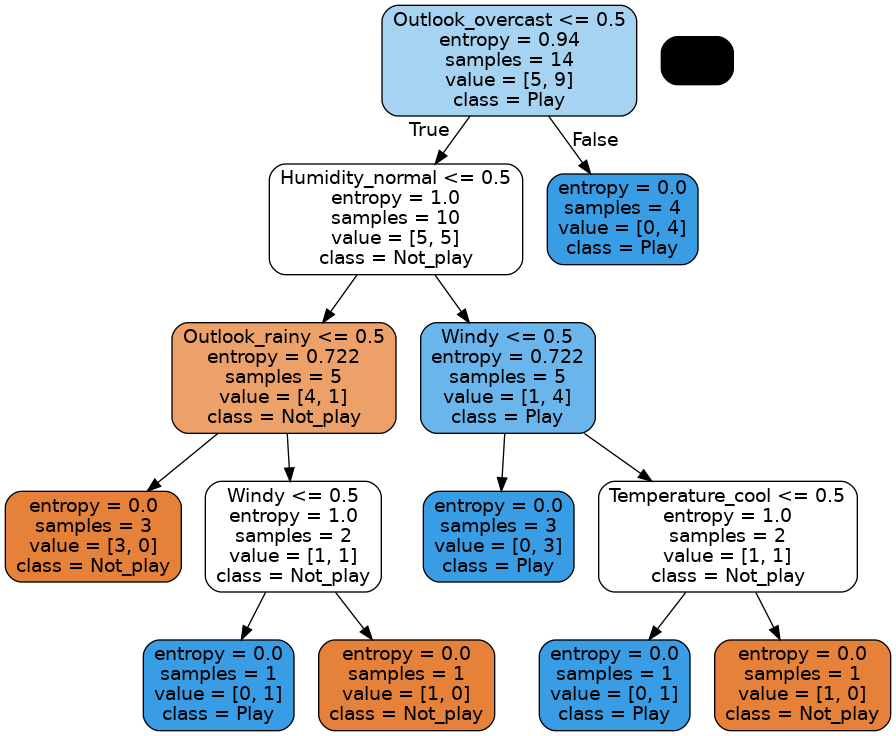

In [12]:
Image(graph.create_png())